## Superheroes Project NLP (1)

This project focuses on key features associated with powerful superheroes.

In [1]:
# !pip install flair
# !pip install seaborn

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
import flair
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('superheroes_nlp_dataset.csv')
display(df.head(5))
print(df.shape)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(1450, 81)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

In [5]:
df['powers_text'].iloc[2]

"  On rare occasions, and through unusual circumstances, Jones has been able to tap into a mysterious, near-limitless energy sources known as the Destiny Force. The Destiny force is believed to be inherent in all humanity. Jones has used this power to alter reality in the past by bringing figures from his own imagination to life or even figures from different times of existence. He has proven able to render thousands of Kree and Skrull warriors immobile with a thought, single-handedly overcome the Atlantean army, augment all of his own physical attributes, heal himself after sustaining life threatening energies and levitate. The full limits of the Destiny Force, its overall nature, why only Jones has been able to harness it at only certain times is unknown.   After being exposed to a weapon powered by gamma radiation designed for use against the Hulk, Jones was mutated by the radiation. As a result, Jones can transform into a superhuman form that resembles the Abomination. Jones has de

### Text analysis (Transformers-based model)

In [6]:
## Missing values of text features
df['history_text'].isna().sum(), df['powers_text'].isna().sum()

(90, 364)

In [7]:
## Text data cleaning (Change to blank and avoid similarity score with "NA" later)
df.fillna(value={'history_text':'', 'powers_text':''}, inplace=True)   
df['history_text'][df['history_text'] == 'NA'] = ''
df['powers_text'][df['powers_text'] == 'NA'] = ''

## Select features related to powerful superhero
newdf = df[['name', 'overall_score', 'history_text', 'powers_text', 'creator', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']]
newdf.head(3)

C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/574573200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['history_text'][df['history_text'] == 'NA'] = ''
C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/574573200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['powers_text'][df['powers_text'] == 'NA'] = ''


,name,overall_score,history_text,powers_text,creator,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,3-D Man,6,"Delroy Garrett, Jr. grew up to become a track ...",,Marvel Comics,85,30,60,60,40,70
1,514A (Gotham),10,He was one of the many prisoners of Indian Hil...,,DC Comics,100,20,30,50,35,100
2,A-Bomb,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics,80,100,80,100,100,80


In [8]:
# df['history_text'].isna().sum(), df['powers_text'].isna().sum()

In [9]:
## # Transformers-based similarity analysis (sentences or phrases)
model = SentenceTransformer('stsb-roberta-large')
# model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

def cos_similarity(sentence1, sentence2):
    # encode sentences to get their embeddings
    embedding1 = model.encode(sentence1, convert_to_tensor=True)
    embedding2 = model.encode(sentence2, convert_to_tensor=True)
    # compute similarity scores of two embeddings
    cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
    return cosine_scores.item()

# test
# cos_similarity("love", "marry")

In [10]:
## Simplicity scores of texts related to "power superheroes"
newdf['historyPower_score1'] = newdf.apply(lambda x: cos_similarity(x['history_text'], 'power superheroes'), axis=1)
newdf['powersPower_score2'] = newdf.apply(lambda x: cos_similarity(x['powers_text'], 'power superheroes'), axis=1)
# print(newdf['historyPower_score1'][newdf['history_text'] == ''], newdf['powersPower_score2'][newdf['powers_text'] == ''])
# newdf.head(5)                                                                        

C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/1230758679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['historyPower_score1'] = newdf.apply(lambda x: cos_similarity(x['history_text'], 'power superheroes'), axis=1)
C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/1230758679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['powersPower_score2'] = newdf.apply(lambda x: cos_similarity(x['powers_text'], 'power superheroes'), axis=1)


In [11]:
newdf.sort_values(by='overall_score', ascending=False).head(10)

,name,overall_score,history_text,powers_text,creator,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,historyPower_score1,powersPower_score2
153,Beyonder,∞,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",Marvel Comics,100,100,100,100,100,90,0.246673,0.378388
450,Eru Iluvatar,∞,Eru is the supreme deity of Arda. He was the s...,,J. R. R. Tolkien,100,100,100,100,100,100,0.186365,0.113130
1337,True Form Oblivion,∞,,"""Now don't think badly of me: I can't help but...",Marvel Comics,100,100,100,100,100,100,0.113130,0.278088
845,Man Of Miracles,∞,The being known as Mother is the creator of t...,,Image Comics,100,100,100,100,100,100,0.041030,0.113130
1202,Spectre Oversoul,∞,,"As a servant of God, The Spectre is granted l...",DC Comics,100,100,100,100,100,80,0.113130,0.332870
174,Black Alice,∞,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,DC Comics,95,100,100,85,100,85,0.165504,0.360305
482,First Spinjitzu Master,∞,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,NaN,100,100,100,100,100,100,0.122258,0.253837
11,Abraxas,∞,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",Marvel Comics,100,100,100,100,100,100,0.345941,0.345851
795,Life Entity,∞,,Powers It's the manifested form of life and c...,DC Comics,100,100,100,100,100,100,0.113130,0.336839
1272,The Beyonder (Earth-1298),∞,Known as the Beyonder due to the fact that he ...,,Marvel Comics,100,100,100,100,100,50,0.275769,0.113130


In [12]:
## First change original place corresponed to text with "blank" to 0 and then fill it with mean
newdf['powersPower_score2'][newdf['powers_text'] == ''] = 0
newdf['historyPower_score1'][newdf['history_text'] == ''] =0

newdf['powersPower_score2'][newdf['powers_text'] == ''] = newdf['powersPower_score2'].mean()
newdf['historyPower_score1'][newdf['history_text'] == ''] = newdf['historyPower_score1'].mean()

newdf.sort_values(by='overall_score', ascending=False).head(5)

C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/3262217156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['powersPower_score2'][newdf['powers_text'] == ''] = 0
C:\Users\Sealion\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/3262217156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,name,overall_score,history_text,powers_text,creator,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,historyPower_score1,powersPower_score2
153,Beyonder,∞,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",Marvel Comics,100,100,100,100,100,90,0.246673,0.378388
450,Eru Iluvatar,∞,Eru is the supreme deity of Arda. He was the s...,,J. R. R. Tolkien,100,100,100,100,100,100,0.186365,0.192718
1337,True Form Oblivion,∞,,"""Now don't think badly of me: I can't help but...",Marvel Comics,100,100,100,100,100,100,0.131170,0.278088
845,Man Of Miracles,∞,The being known as Mother is the creator of t...,,Image Comics,100,100,100,100,100,100,0.041030,0.192718
1202,Spectre Oversoul,∞,,"As a servant of God, The Spectre is granted l...",DC Comics,100,100,100,100,100,80,0.131170,0.332870


## Numerical features analysis

In [13]:
# replace '-' with '0' and '∞' with '300' (max), and change type to integer
newdf['overall_score'][newdf['overall_score'] == '-'] = '0'
newdf['overall_score'][newdf['overall_score'] == '∞'] = '300'
newdf['overall_score'] = newdf['overall_score'].astype('int64')
# set(newdf['overall_score'])

C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/77303813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['overall_score'][newdf['overall_score'] == '-'] = '0'
C:\Users\Sealion\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/77303813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

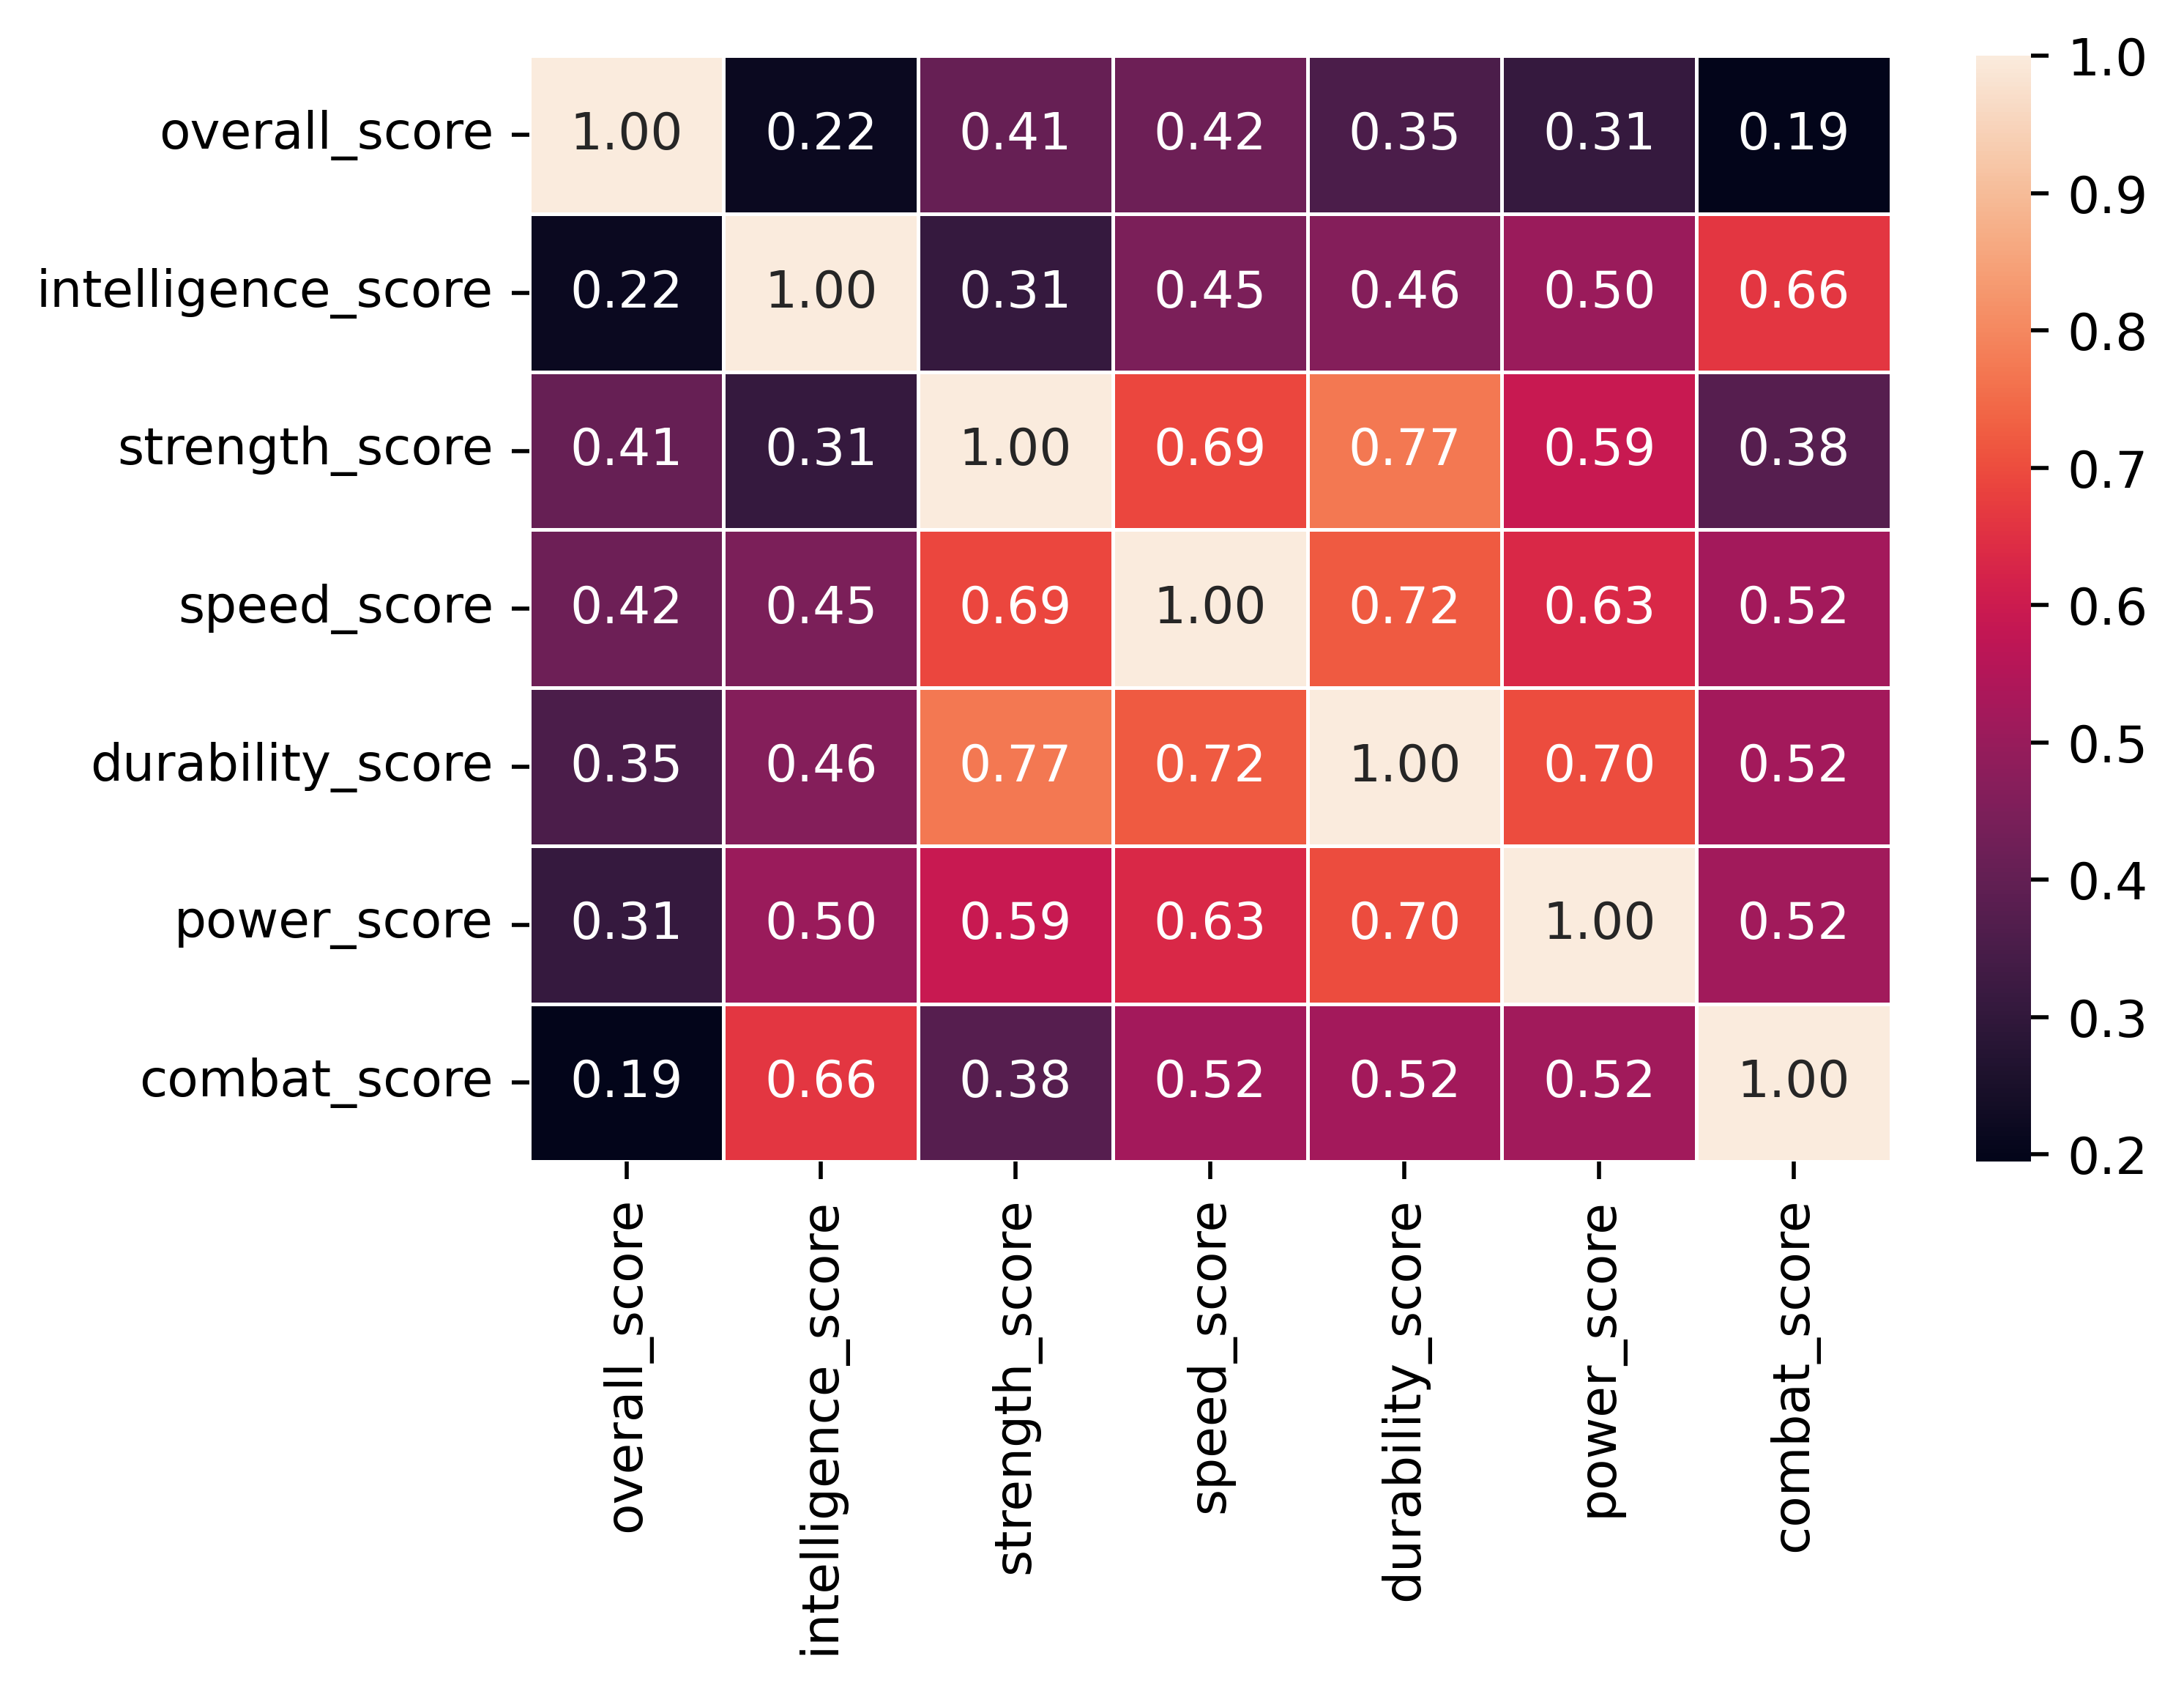

In [14]:
## Correlation analysis.
scores_df = newdf[['name', 'overall_score', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']]        
plt.figure(figsize=(6,4), dpi =500)
corr = scores_df.corr(method = 'pearson')
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.title('Correlatin among some features with scores')
plt.show()

<Figure size 1440x10800 with 0 Axes>

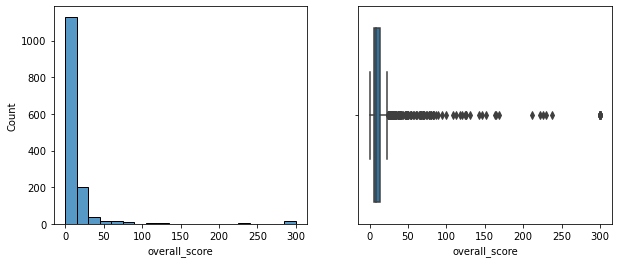

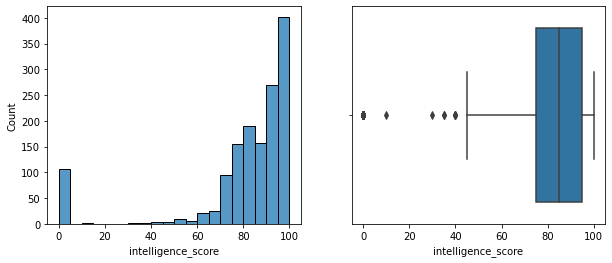

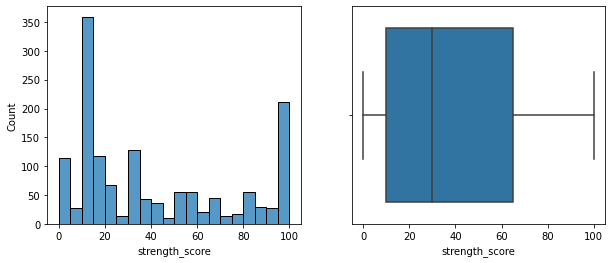

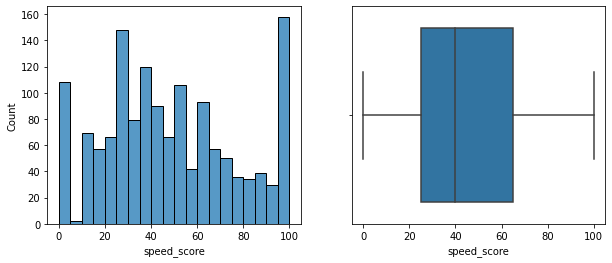

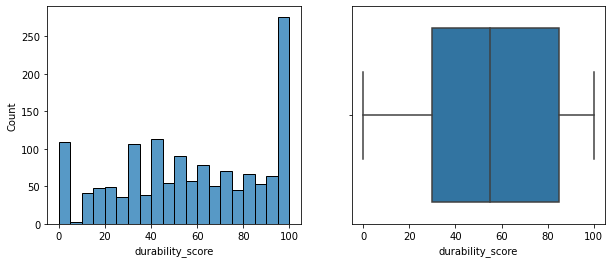

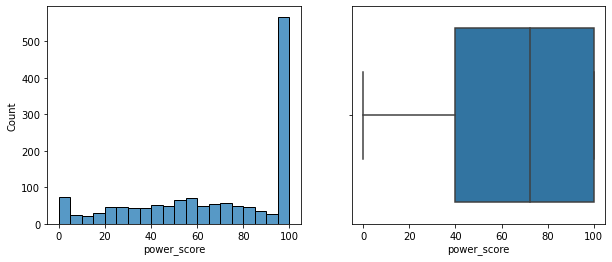

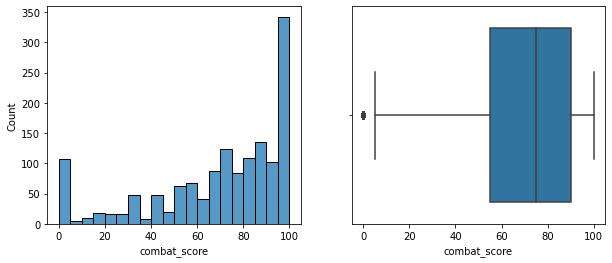

In [15]:
## Distributions (histplot/boxplot)
plt.figure(figsize=(20, 150))
for col in scores_df.columns[1:]:
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    sns.histplot(data=scores_df, x= col, ax=ax[0], bins=20)
    sns.boxplot(data=scores_df, x=col, ax=ax[1])    

## Find the most powerful superheros 

In [16]:
newdf['totalStats_score'] = newdf['intelligence_score'] + newdf['strength_score'] + newdf['speed_score'] + newdf['durability_score']\
                        + newdf['power_score'] + newdf['combat_score']
newdf['tot_text_score'] = (newdf['historyPower_score1'] + newdf['powersPower_score2'])

sort_newdf = newdf.sort_values(['overall_score', 'totalStats_score', 'powersPower_score2'], ascending= [False, False, False])
display(sort_newdf.head(20)) 

C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/2866761543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['totalStats_score'] = newdf['intelligence_score'] + newdf['strength_score'] + newdf['speed_score'] + newdf['durability_score']\
C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/2866761543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['tot_text_score'] = (newdf['historyPower_score1'] + newdf['powersPower_score2'])


,name,overall_score,history_text,powers_text,creator,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,historyPower_score1,powersPower_score2,totalStats_score,tot_text_score
809,Living Tribunal,300,,The Living Tribunal was the embodiment of the...,Marvel Comics,100,100,100,100,100,100,0.131170,0.480745,600,0.611915
11,Abraxas,300,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",Marvel Comics,100,100,100,100,100,100,0.345941,0.345851,600,0.691791
795,Life Entity,300,,Powers It's the manifested form of life and c...,DC Comics,100,100,100,100,100,100,0.131170,0.336839,600,0.468009
1281,The Golden Master,300,The Golden Master is an ancient figure of evil...,Lloyd eventually unlocked the full potential o...,NaN,100,100,100,100,100,100,0.264952,0.289137,600,0.554089
1337,True Form Oblivion,300,,"""Now don't think badly of me: I can't help but...",Marvel Comics,100,100,100,100,100,100,0.131170,0.278088,600,0.409259
1290,The One Below All,300,,The One Below All is the source of the mutagen...,Marvel Comics,100,100,100,100,100,100,0.131170,0.259841,600,0.391012
526,Golden Master's Mech,300,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,NaN,100,100,100,100,100,100,0.187346,0.258049,600,0.445395
482,First Spinjitzu Master,300,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,NaN,100,100,100,100,100,100,0.122258,0.253837,600,0.376095
803,Little Krishna,300,,Nigh-Omnipotence Krishna is the 8th avatar of ...,NaN,100,100,100,100,100,100,0.131170,0.221897,600,0.353068
450,Eru Iluvatar,300,Eru is the supreme deity of Arda. He was the s...,,J. R. R. Tolkien,100,100,100,100,100,100,0.186365,0.192718,600,0.379083


In [17]:
sort_newdf['creator'].isna().sum(), sort_newdf['creator'].shape

(139, (1450,))

In [18]:
newdf['creator'].value_counts()

Marvel Comics             615
DC Comics                 444
Shueisha                   37
Dark Horse Comics          29
Lego                       22
George Lucas               18
Image Comics               17
NBC - Heroes               16
Ubisoft                     9
J. R. R. Tolkien            8
J. K. Rowling               8
Wildstorm                   7
George R. R. Martin         7
Team Epic TV                6
HarperCollins               6
SyFy                        6
Capcom                      5
Icon Comics                 4
Mortal Kombat               4
ABC Studios                 4
Nintendo                    4
Star Trek                   4
Sony Pictures               3
Hasbro                      3
Disney                      3
Namco                       3
Cartoon Network             2
Universal Studios           2
IDW Publishing              2
Clive Barker                2
Mattel                      1
Sega                        1
Microsoft                   1
Hanna-Barb

### Each Race

In [19]:
df['has_immortality'].value_counts()

0.0    1181
1.0     202
Name: has_immortality, dtype: int64

In [20]:
# Use sum for value (0,1)
df.groupby('type_race')['has_immortality'].sum().nlargest(5)

type_race
God / Eternal    36.0
Human            29.0
Demon            18.0
New God          11.0
Cosmic Entity     8.0
Name: has_immortality, dtype: float64

## Parademon

In [21]:
np.where(df == 'Parademon')

(array([991, 991], dtype=int64), array([ 0, 24], dtype=int64))

In [22]:
# Situation 1
df[df['name'] == 'Parademon']

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
991,Parademon,NaN,NaN,2,,When all else fails they can discharge th...,55,30,15,50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
df[df['name'] == 'Parademon']['creator']

991    DC Comics
Name: creator, dtype: object

In [24]:
# Sitation 2
df.columns[24]

'type_race'

In [25]:
df[df['type_race']=='Parademon']

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
991,Parademon,NaN,NaN,2,,When all else fails they can discharge th...,55,30,15,50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
dfTest = df[['name', 'creator', 'type_race']]
dfTest[dfTest['type_race']=='Parademon']

,name,creator,type_race
991,Parademon,DC Comics,Parademon


## Comic Creator

In [27]:
# Original data
df['creator'].value_counts()

Marvel Comics             615
DC Comics                 444
Shueisha                   37
Dark Horse Comics          29
Lego                       22
George Lucas               18
Image Comics               17
NBC - Heroes               16
Ubisoft                     9
J. R. R. Tolkien            8
J. K. Rowling               8
Wildstorm                   7
George R. R. Martin         7
Team Epic TV                6
HarperCollins               6
SyFy                        6
Capcom                      5
Icon Comics                 4
Mortal Kombat               4
ABC Studios                 4
Nintendo                    4
Star Trek                   4
Sony Pictures               3
Hasbro                      3
Disney                      3
Namco                       3
Cartoon Network             2
Universal Studios           2
IDW Publishing              2
Clive Barker                2
Mattel                      1
Sega                        1
Microsoft                   1
Hanna-Barb

In [28]:
## If only consider top50 (power superhero)
sort_newdf.iloc[:50, ]['creator'].value_counts()

Marvel Comics          19
DC Comics              13
George Lucas            2
J. R. R. Tolkien        1
Image Comics            1
George R. R. Martin     1
Shueisha                1
Lego                    1
Konami                  1
Hasbro                  1
Name: creator, dtype: int64

In [29]:
## 5a.Find names, real names and alias of superhero who is part of most teams
comics_df = df.iloc[sort_newdf[sort_newdf['creator'] == 'Marvel Comics'].index,:][['name', 'real_name', 'full_name', 'aliases', 'creator', 'teams']]
comics_df.head()

,name,real_name,full_name,aliases,creator,teams
809,Living Tribunal,NaN,NaN,"['Living Trinity, Magistrate, High Judge of Th...",Marvel Comics,[]
11,Abraxas,Abraxas,Abraxas,[''],Marvel Comics,"['Cosmic Beings', 'Thor Corps', 'Gods of Esgar..."
1337,True Form Oblivion,Oblivion,Oblivion,"['Oblivion', 'Multi-Oblivion']",Marvel Comics,[]
1290,The One Below All,Unknown,NaN,[''],Marvel Comics,[]
153,Beyonder,NaN,NaN,"['Ataxi, The Beyond Realm, Frank, Goblin Force...",Marvel Comics,"['Gods', 'Beyonders']"


In [30]:
## For creator of Marvel Comics
comics_df['teams'].tolist()

['[]',
 "['Cosmic Beings', 'Thor Corps', 'Gods of Esgard', 'Asgardians', 'Dark Avengers']",
 '[]',
 '[]',
 "['Gods', 'Beyonders']",
 '[]',
 '[]',
 '[]',
 "['Gods', 'Demons', 'Titans']",
 '[]',
 '[]',
 "['Defenders', 'Neo-Knights', 'The Mighty Avengers', 'New Avengers', 'Ultimate Fantastic Four', 'New Warriors', 'Marvel Knights', 'Secret Defenders', 'Midnight Sons', 'Avengers']",
 '[]',
 "['Dark X-Men']",
 "['Asgardians']",
 "['Avengers', 'Asgardians']",
 '[]',
 '[]',
 "['Masters of Evil', 'Gods', 'Titans', 'Galactic Council', 'Infinity Watch', 'Defenders']",
 "['Gods', 'Hell Lords', 'Demons']",
 '[]',
 '[]',
 "['Future Foundation', 'Gods', 'Power Pack', 'Generation X', 'Daydreamers']",
 "['Heroes For Hire']",
 '[]',
 "['Defenders', 'Neo-Knights', 'Contingency', 'Secret Defenders', 'Annihilators', 'God Squad', 'Avengers', 'Star Masters', 'Heralds of Galactus']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[\'New Warriors\', \'Dark Avengers\', \'Mighty Avengers\', \'Super Soldiers\', \'Gods\', \'Horse

In [31]:
df.loc[sort_newdf.index,:][['name', 'creator', 'teams']]

,name,creator,teams
809,Living Tribunal,Marvel Comics,[]
11,Abraxas,Marvel Comics,"['Cosmic Beings', 'Thor Corps', 'Gods of Esgar..."
795,Life Entity,DC Comics,[]
1281,The Golden Master,NaN,[]
1337,True Form Oblivion,Marvel Comics,[]
...,...,...,...
594,Hepzibah,Marvel Comics,['X-Men']
1138,Screaming Mimi,Marvel Comics,[]
1215,Splice,Marvel Comics,[]
658,Jack Bauer,NaN,[]


In [32]:
comics_df[['name', 'creator', 'teams']].head(10)

,name,creator,teams
809,Living Tribunal,Marvel Comics,[]
11,Abraxas,Marvel Comics,"['Cosmic Beings', 'Thor Corps', 'Gods of Esgar..."
1337,True Form Oblivion,Marvel Comics,[]
1290,The One Below All,Marvel Comics,[]
153,Beyonder,Marvel Comics,"['Gods', 'Beyonders']"
1272,The Beyonder (Earth-1298),Marvel Comics,[]
522,Goblin Force,Marvel Comics,[]
1286,The Keeper,Marvel Comics,[]
416,Dormammu,Marvel Comics,"['Gods', 'Demons', 'Titans']"
357,Dark Phoenix (Venomized),Marvel Comics,[]


In [35]:
## For creator of DC Comics (as control)
DC_Comics_df = df.iloc[sort_newdf[sort_newdf['creator'] == 'DC Comics'].index,:][['name', 'real_name', 'full_name', 'aliases', 'creator', 'teams']]
DC_Comics_df

,name,real_name,full_name,aliases,creator,teams
795,Life Entity,The Life Entity,NaN,"['Life Entity, The Entity, White Entity, Sines...",DC Comics,[]
882,Michael Demiurgos,Michael Demiurgos,Michael Demiurgos,['Michael the Archangel'],DC Comics,['The Presence']
1202,Spectre Oversoul,Aztar,Aztar,"['Spirit of Vengeance, Wrath of God, Spirit of...",DC Comics,[]
174,Black Alice,Lori Zechlin,Lori Zechlin,[''],DC Comics,"['Secret Six', 'Young Justice', 'Birds of Prey']"
376,Death Of The Endless,Death,Death Of The Endless,['Grandmother Death / Teleute / Madame Mort'],DC Comics,[]
...,...,...,...,...,...,...
295,Chroma,Roy G. Bivolo,Roy G. Bivolo,['Rainbow Raider'],DC Comics,['Rogues']
701,Josiah Power,Josiah Power,Josiah Power,[''],DC Comics,[]
909,Moloch,Edgar William Jacobi,Edgar William Jacobi,"['William Edgar Bright, Moloch the Mystic ']",DC Comics,['Watchmen']
1291,The One,NaN,NaN,[''],DC Comics,[]


In [36]:
## For creator of DC Comics (as control)
DC_Comics_df['teams'].tolist()

['[]',
 "['The Presence']",
 '[]',
 "['Secret Six', 'Young Justice', 'Birds of Prey']",
 '[]',
 '[]',
 '[]',
 "['Watchmen', 'The Crimebusters']",
 '[]',
 '[]',
 '[]',
 "['Black Lantern Corps']",
 "['Black Lantern Corps', 'Black Lantern Corps']",
 '[]',
 "['Sinestro Corps', 'Black Lantern Corps']",
 '[]',
 "['Sentinels of Magic']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "['New Gods of Apokolips']",
 '[\'Justice League Europe\', \'United States Air Force\', \'Justice League\', "Monarch\'s Army"]',
 '[]',
 "['Black Marvel Family', 'Suicide Squad', 'Justice League Elite', 'League of Assassins', 'The Society']",
 "['Secret Society of Super-Villains', 'The Society']",
 '[]',
 '[]',
 '[]',
 "['Teen Titans', 'Extreme Justice', 'Rogues', 'Minutemen', 'Watchmen']",
 "['Justice League Elite', 'Superfriends', 'Justice Legion Alpha', 'Time Masters', 'Black Lantern Corps', 'Legion of Super-Heroes', 'Justice League', 'Justice League of America', 'Justice League Antarctica']",
 "['Flash Fam

In [37]:
df.groupby('creator')['teams'].apply(list)

creator
ABC Studios                                                [[], [], [], []]
Blizzard Entertainment                                                 [[]]
Capcom                                                 [[], [], [], [], []]
Cartoon Network                                     [[], ['Flex Fighters']]
Clive Barker                                                       [[], []]
DC Comics                 [[], ['Blue Lantern Corps', 'Green Lantern Cor...
Dark Horse Comics         [['Bureau for Paranormal Research and Defense'...
Disney                                      [[], ['Incredible Family'], []]
Dreamworks                                                             [[]]
George Lucas              [['Jedi Order'], ['Galactic Empire', 'Sith Ord...
George R. R. Martin                            [[], [], [], [], [], [], []]
Hanna-Barbera                                                          [[]]
HarperCollins                                      [[], [], [], [], [], []]
Hasb

In [38]:
## For creator of Marvel Comics
# [df.groupby('creator')['teams'].apply(list)[i] for i in df.groupby('creator')['teams'].apply(list).keys() if i == 'Marvel Comics']

import ast
import collections
def char_num(creator_unit):  
    tot_teams = df[df['creator'] == creator_unit]['teams'].tolist()
    L = [ast.literal_eval(x) for x in tot_teams]
    tot_chars = [j for i in L for j in i]
    counts = dict(collections.Counter(tot_chars))
    sort_counts = {k: v for k, v in sorted(counts.items(), key=lambda x: x[1], reverse = True)}
    return sort_counts

In [39]:
char_num('Marvel Comics')

{'X-Men': 63,
 'Avengers': 48,
 'Marvel Knights': 31,
 'Defenders': 23,
 'Thunderbolts': 20,
 'Secret Defenders': 18,
 'Gods': 17,
 'The Mighty Avengers': 17,
 'Heroes For Hire': 16,
 'X-Force': 16,
 "Cerebro's X-Men": 15,
 'Avengers Resistance': 15,
 'X-Factor': 15,
 'Masters of Evil': 14,
 'New Warriors': 13,
 'Avengers West Coast': 13,
 "Apocalypse's Horsemen": 13,
 'S.H.I.E.L.D.': 12,
 'The FIRM': 12,
 'Guardians of the Galaxy': 12,
 'Secret Empire': 11,
 'A.R.M.O.R.': 11,
 'New Avengers': 10,
 'Neo-Knights': 10,
 'Brotherhood of Evil Mutants': 10,
 'Frightful Four': 10,
 'Brotherhood of Mutants': 10,
 'Ultimate X-Men': 10,
 'Weapon X': 9,
 'Generation X': 9,
 'New Mutants': 9,
 'Dark X-Men': 9,
 'Contingency': 9,
 'Sinister Six': 9,
 'The Ultimates': 9,
 'Asgardians': 8,
 'Superiour Six': 8,
 'Dark Avengers': 8,
 'National Force': 8,
 'Agency X': 8,
 'Midnight Sons': 8,
 'Excalibur': 8,
 'Fantastic Four': 7,
 'Alpha Flight': 7,
 "Black Cat's Gang": 7,
 'Inhumans': 7,
 'A-Force': 7

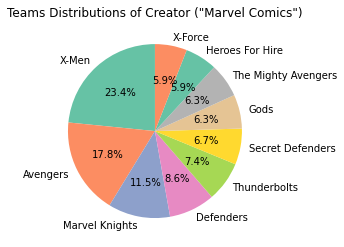

In [40]:
# Plot (top10) for teams of creator ('Marvel Comics')
new_marvel = {k:v for k,v in char_num('Marvel Comics').items() if k in list(char_num('Marvel Comics').keys())[:10]}

plt.pie(new_marvel.values(), labels=new_marvel.keys(),startangle=90, autopct='%.1f%%', colors=plt.cm.Set2.colors)
plt.title('Teams Distributions of Creator ("Marvel Comics")')
plt.show()

In [41]:
# Just for control
char_num('DC Comics')

{'Justice Legion Alpha': 36,
 'Justice League': 34,
 'The Society': 28,
 'Suicide Squad': 24,
 'Justice League of America': 20,
 'Flash Family': 20,
 'Batman Family': 17,
 'Black Lantern Corps': 16,
 'Birds of Prey': 14,
 'Teen Titans': 14,
 'League of Assassins': 14,
 'Secret Six': 13,
 'Female Furies': 12,
 'Justice Society of America': 12,
 'Legion of Super-Heroes': 11,
 'Living Assault Weapons': 11,
 'Young Justice': 11,
 'Minutemen': 10,
 'The Outsiders': 10,
 'Superfriends': 10,
 'Justice League Elite': 10,
 'Rogues': 9,
 'New Gods of Apokolips': 9,
 'Watchmen': 8,
 'Super Buddies': 8,
 'Extreme Justice': 7,
 'Justice League Europe': 7,
 'Superman Revenge Squad': 7,
 'Secret Society of Super-Villains': 6,
 'Sinestro Corps': 6,
 'The Crimebusters': 6,
 'Red Lantern Corps': 6,
 'Green Lantern Corps': 5,
 'Aquaman Family': 5,
 'Justice League Atlantis': 5,
 'Justice League Antarctica': 5,
 'Outsiders': 5,
 'New Teen Titans': 5,
 'All-Star Squadron': 5,
 'Time Masters': 4,
 'Titans':

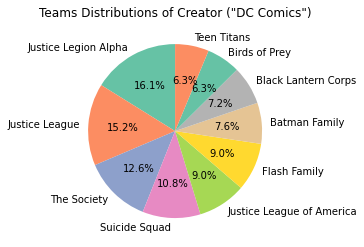

In [42]:
# Plot (top10) for teams of creator ('DC Comics'), just for control.
new_DC_Comics = {k:v for k,v in char_num('DC Comics').items() if k in list(char_num('DC Comics').keys())[:10]}

plt.pie(new_DC_Comics.values(), labels=new_DC_Comics.keys(),startangle=90, autopct='%.1f%%', colors=plt.cm.Set2.colors)
plt.title('Teams Distributions of Creator ("DC Comics")')
plt.show()

## Feature of history_text (Sentiment analysls)

### [Note]: Due to expensive computation of this part, we only consider first 500 rows.

In [65]:
import flair
import numpy as np
import pandas as pd

In [66]:
## From raw data
rawdf = pd.read_csv('superheroes_nlp_dataset.csv')
df = rawdf.iloc[:100, ]
print(df.shape)
# print(df.shape)

(100, 81)


In [67]:
df.fillna(value={'history_text':'', 'powers_text':''}, inplace=True)   
df['history_text'][df['history_text'] == 'NA'] = ''
df['powers_text'][df['powers_text'] == 'NA'] = ''

df['history_text'][df['history_text'] == ''] = 'NA'
df['powers_text'][df['powers_text'] == ''] = 'NA'

sentiment_df = df[['name', 'history_text', 'powers_text', 'creator', 'teams']]
sentiment_df.head(5)

C:\Users\Sealion\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/648269284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['history_text'][df['history_text'] == 'NA'] = ''
C:\Users\Sealion\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,name,history_text,powers_text,creator,teams
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",NA,Marvel Comics,"['Annihilators', 'Asgardians', 'Avengers', 'Ne..."
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,NA,DC Comics,[]
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics,"['Teen Brigade', 'Ultimate Fantastic Four', 'U..."
3,Aa,Aa is one of the more passive members of the P...,NA,DC Comics,"['Blue Lantern Corps', 'Green Lantern Corps', ..."
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,NA,DC Comics,[]


In [68]:
# classifier = pipeline('sentiment-analysis')
# df['sentiment_scores'] = df.iloc[:10, ]['history_text'].apply(lambda x: classifier(x))
# df.head(5)

In [69]:
def senti_score(text):
    model = flair.models.TextClassifier.load('en-sentiment')
    if text == "NA":
        return ['NA', 'NA']       
        
    else:
        sentence = flair.data.Sentence(text)
        model.predict(sentence)
        return [sentence.labels[0].score, sentence.labels[0].value]

In [70]:
sentiment_df['hist_sentiment_score'] = sentiment_df['history_text'].apply(lambda x: senti_score(x)[0])
sentiment_df['hist_sentiment_value'] = sentiment_df['history_text'].apply(lambda x: senti_score(x)[1])
sentiment_df['power_sentiment_score'] = sentiment_df['powers_text'].apply(lambda x: senti_score(x)[0])
sentiment_df['power_sentiment_value'] = sentiment_df['powers_text'].apply(lambda x: senti_score(x)[1])
sentiment_df.head()

C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/1744558424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['hist_sentiment_score'] = sentiment_df['history_text'].apply(lambda x: senti_score(x)[0])
C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/1744558424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['hist_sentiment_value'] = sentiment_df['history_text'].apply(lambda x: senti_score(x)[1])
C:\Users\Sealion\AppData\Local\Temp/ipykernel_13616/1744558424.py:3: Setting

,name,history_text,powers_text,creator,teams,hist_sentiment_score,hist_sentiment_value,power_sentiment_score,power_sentiment_value
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",NA,Marvel Comics,"['Annihilators', 'Asgardians', 'Avengers', 'Ne...",0.621892,POSITIVE,NA,NA
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,NA,DC Comics,[],0.954088,NEGATIVE,NA,NA
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",0.543018,NEGATIVE,0.978667,POSITIVE
3,Aa,Aa is one of the more passive members of the P...,NA,DC Comics,"['Blue Lantern Corps', 'Green Lantern Corps', ...",0.783323,NEGATIVE,NA,NA
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,NA,DC Comics,[],0.944511,POSITIVE,NA,NA


In [71]:
sentiment_df.head()

,name,history_text,powers_text,creator,teams,hist_sentiment_score,hist_sentiment_value,power_sentiment_score,power_sentiment_value
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",NA,Marvel Comics,"['Annihilators', 'Asgardians', 'Avengers', 'Ne...",0.621892,POSITIVE,NA,NA
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,NA,DC Comics,[],0.954088,NEGATIVE,NA,NA
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",0.543018,NEGATIVE,0.978667,POSITIVE
3,Aa,Aa is one of the more passive members of the P...,NA,DC Comics,"['Blue Lantern Corps', 'Green Lantern Corps', ...",0.783323,NEGATIVE,NA,NA
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,NA,DC Comics,[],0.944511,POSITIVE,NA,NA


In [77]:
new_sentiDF = sentiment_df[(sentiment_df['hist_sentiment_value'] == 'NEGATIVE') & (sentiment_df['power_sentiment_value'] == 'POSITIVE')]
display(new_sentiDF)

,name,history_text,powers_text,creator,teams,hist_sentiment_score,hist_sentiment_value,power_sentiment_score,power_sentiment_value
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",Marvel Comics,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",0.543018,NEGATIVE,0.978667,POSITIVE
6,Abe Sapien,"Sapien began life as Langdon Everett Caul, a ...",Abe is a humanoid amphibious creature. He has...,Dark Horse Comics,['Bureau for Paranormal Research and Defense'],0.695609,NEGATIVE,0.998167,POSITIVE
8,Abomination,"Formerly known as Emil Blonsky, a spy of Sovie...",'Blonsky''s transformation into the Abominatio...,Marvel Comics,"['Annihilators', 'Wrecking Crew', 'Masters of ...",0.99933,NEGATIVE,0.973697,POSITIVE
11,Abraxas,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",Marvel Comics,"['Cosmic Beings', 'Thor Corps', 'Gods of Esgar...",0.652492,NEGATIVE,0.923484,POSITIVE
16,Acidicus,"During the Serpentine Wars, Acidicus and the o...",Acidicus has the power just like The other Ven...,NaN,[],0.720865,NEGATIVE,0.990952,POSITIVE
26,Agent May (MCU),Melinda May was born to William and to the int...,"May is an accomplished pilot, able to perform ...",Marvel Comics,[],0.997015,NEGATIVE,0.999557,POSITIVE
27,Agent Zero (FOX),"During mid-late 1973, Zero was a member of Tea...",Zero can absorb kinetic energy to further incr...,Marvel Comics,[],0.821144,NEGATIVE,0.876764,POSITIVE
32,Ajax,The man known only as Francis was the former ...,"As the Attending, Ajax possessed enhanced str...",Marvel Comics,[],0.847534,NEGATIVE,0.982448,POSITIVE
33,Akita,"Akita and her twin brother, Kataru, were about...","Originally, she was insecure about herself bec...",Lego,[],0.889761,NEGATIVE,0.999714,POSITIVE
35,Alex Mercer,"Born as Alexander J. Mercer, Alex experience...","Once reanimated by the Blacklight virus, ever...",Wildstorm,[],0.950573,NEGATIVE,0.999791,POSITIVE


In [78]:
new_sentiDF['name'].tolist()

['A-Bomb',
 'Abe Sapien',
 'Abomination',
 'Abraxas',
 'Acidicus',
 'Agent May (MCU)',
 'Agent Zero (FOX)',
 'Ajax',
 'Akita',
 'Alex Mercer',
 'Amanda Waller',
 'A.M.A.Z.O. (CW)',
 'Amazo',
 'Angel',
 'Ant-Man (MCU)',
 'Aquababy',
 'Archangel',
 'Arcturus',
 'Ariel',
 'Armor',
 'Artemis (CW)',
 'Atom Girl']

In [90]:
## List of superheroes having negative past but now aligned positively from the first 100 rows (due to expensive compution constraint)
new_sentiDF.groupby(['creator', 'hist_sentiment_value'])['hist_sentiment_value'].count()

creator            hist_sentiment_value
DC Comics          NEGATIVE                 4
Dark Horse Comics  NEGATIVE                 2
Lego               NEGATIVE                 1
Marvel Comics      NEGATIVE                10
Wildstorm          NEGATIVE                 1
Name: hist_sentiment_value, dtype: int64

In [91]:
new_sentiDF.groupby(['creator', 'power_sentiment_value'])['power_sentiment_value'].count()

creator            power_sentiment_value
DC Comics          POSITIVE                  4
Dark Horse Comics  POSITIVE                  2
Lego               POSITIVE                  1
Marvel Comics      POSITIVE                 10
Wildstorm          POSITIVE                  1
Name: power_sentiment_value, dtype: int64